In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv(r"C:\Users\DELL\Downloads\train.csv")
test=pd.read_csv(r"C:\Users\DELL\Downloads\test.csv")
titanic=pd.concat([train, test])

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [6]:
titanic.shape

(1309, 12)

In [7]:
list(titanic.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

Exploratory Data Analysis and Data cleaning

In [8]:
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

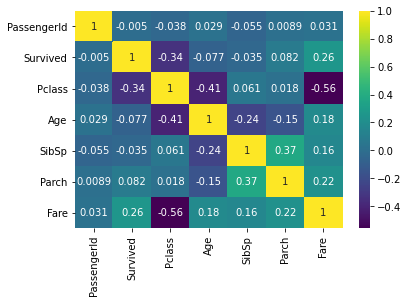

In [9]:
sns.heatmap(titanic.corr(),annot=True,cmap='viridis')

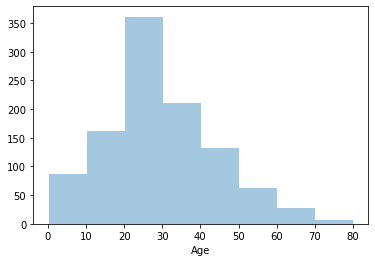

In [10]:
sns.distplot(titanic['Age'].dropna(),kde=False, bins=8)

In [11]:
def classification(passenger_age):
    if passenger_age<=30:
        return 'Young'
    elif passenger_age>30 and passenger_age<55:
        return 'Middle-aged'
    else:
        return 'Elderly'
    

In [12]:
titanic['Age Classification']=titanic['Age'].apply(classification)

In [14]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Classification
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Middle-aged
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Middle-aged
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Middle-aged
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Elderly
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Middle-aged
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Young
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Young
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Young


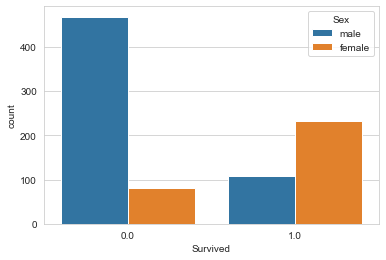

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=titanic, hue='Sex')

In [16]:
titanic.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1.0         233
        0.0          81
male    0.0         468
        1.0         109
Name: Survived, dtype: int64

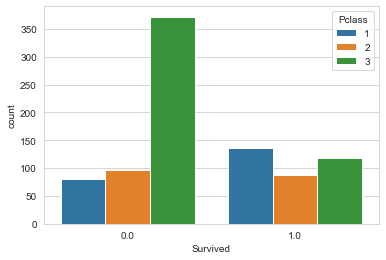

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=titanic, hue='Pclass')

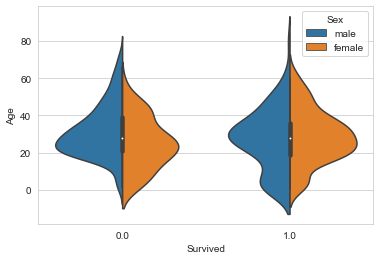

In [18]:
sns.set_style('whitegrid')
sns.violinplot(x='Survived', y='Age',hue='Sex', split=True, data=titanic)

In [19]:
titanic.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1.0         136
        0.0          80
2       0.0          97
        1.0          87
3       0.0         372
        1.0         119
Name: Survived, dtype: int64

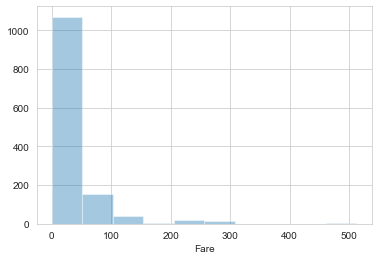

In [20]:
sns.distplot(titanic['Fare'], kde=False, bins=10)

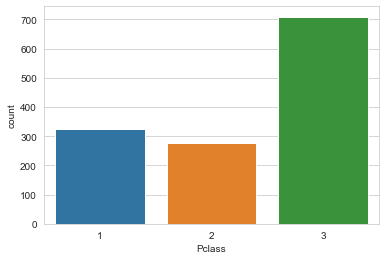

In [21]:
sns.countplot(x='Pclass', data=titanic)

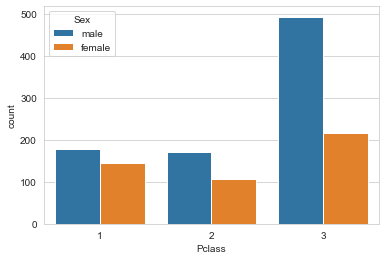

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass', data=titanic, hue='Sex')

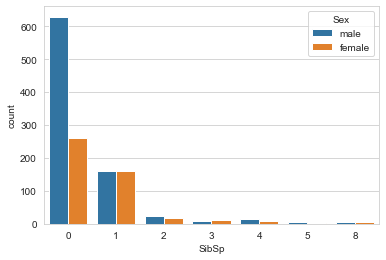

In [23]:
sns.countplot(x='SibSp', data=titanic, hue='Sex')

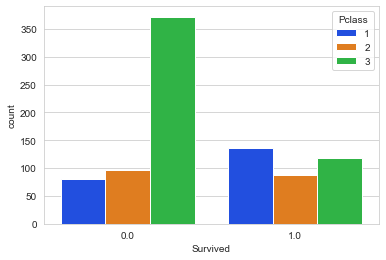

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic,hue='Pclass', palette='bright')

In [25]:
titanic['Cabin'].dropna(inplace=True)

In [26]:
l=[]
for i in titanic['Cabin']:
    a=str(i)
    l.append(a[0])
cabin_df=pd.DataFrame(l)
def cabin_no(j):
    if j=='A':
        return 1
    elif j=='B':
        return 2
    elif j=='C':
        return 3
    elif j=='D':
        return 4
    elif j=='E':
        return 5
    elif j=='G':
        return 6
    else:
        pass
cabin_df[0]=cabin_df[0].apply(cabin_no)
cabin_df.dropna(inplace=True)
cabin_df
#1,2,3,4,5 and 6 are numericals assigned to cabin A,B,C,D,E and G respectively. All the remaining cabins are dropped.

,0
0,3.0
1,3.0
2,5.0
3,6.0
4,3.0
...,...
290,4.0
291,4.0
292,3.0
293,3.0


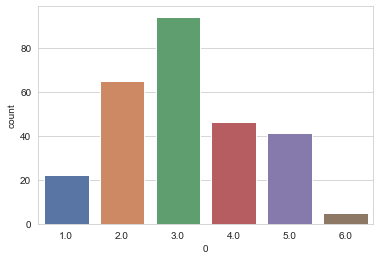

In [27]:
sns.countplot(x=cabin_df[0],data=cabin_df, palette='deep')

In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Classification
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Middle-aged
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Middle-aged
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Middle-aged


In [29]:
#Most passengers belong to the third class
#Fare for most of the passengers is less than 50 bucks
#Among the passengers that survived, the number of females is greater than the number of males.
#Age of the passengers: Highest number of passengers aged between 20 to 30
#>600 passengers on board are single males
#Majority that have survived are from the 1st class and most number of dead people belong to the third class


Filling the missing values

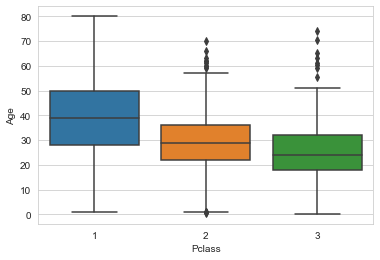

In [30]:
sns.boxplot(x='Pclass', y='Age',data=titanic)

In [31]:
def mean(column):
    age=column[0]
    Pclass=column[1]
    if pd.isnull(age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return age
    

In [32]:
titanic['Age']=titanic[['Age','Pclass']].apply(mean,axis=1)

In [33]:
titanic['Embarked'].fillna('S',inplace=True)
#Since most of the values in Embarked column are equivalent to S.

In [34]:
titanic.drop(['Name','Ticket','Cabin','PassengerId','Age Classification'],axis=1,inplace=True)

In [35]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


In [36]:
titanic.dropna(inplace=True)

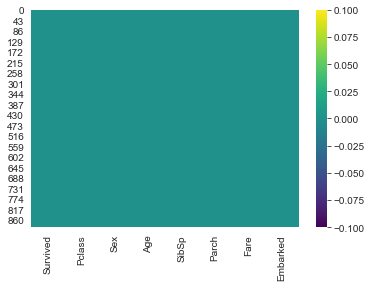

In [37]:
sns.heatmap(titanic.isnull(), cmap='viridis')

 Filling in categorical columns with dummy variables

In [38]:
Sex=pd.get_dummies(titanic['Sex'],drop_first=True)
Sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [39]:
Embarked=pd.get_dummies(titanic['Embarked'],drop_first=True)
Embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [40]:
Pclass=pd.get_dummies(titanic['Pclass'],drop_first=True)
Pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [41]:
titanic=pd.concat([titanic,Embarked,Sex],axis=1)

In [42]:
titanic.drop(['Sex','Embarked'],axis=1,inplace=True)

In [43]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0.0,3,22.0,1,0,7.2500,0,1,1
1,1.0,1,38.0,1,0,71.2833,0,0,0
2,1.0,3,26.0,0,0,7.9250,0,1,0
3,1.0,1,35.0,1,0,53.1000,0,1,0
4,0.0,3,35.0,0,0,8.0500,0,1,1


In [44]:
X=titanic.drop('Survived',axis=1)
y=titanic['Survived']

In [45]:
from sklearn.model_selection import train_test_split
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.3,random_state=101)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
log_reg=LogisticRegression(max_iter=200)

In [48]:
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [49]:
predictions=log_reg.predict(X_test)

In [50]:
predictions

array([1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 0.

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       395
         1.0       0.73      0.75      0.74       228

    accuracy                           0.81       623
   macro avg       0.79      0.80      0.80       623
weighted avg       0.81      0.81      0.81       623



In [53]:
print(confusion_matrix(y_test, predictions))

[[332  63]
 [ 56 172]]


In [54]:
Accuracy= (331+172)/(331+64+56+172) #(TP+TN)/(TP+TN+FP+FN)

In [55]:
Accuracy
#Accuracy of Prediction

0.8073836276083467